In [16]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [13]:
# Set rcParams for text size
plt.rcParams.update({
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'figure.figsize': [6, 3]
})

In [5]:
import re
from datetime import datetime

# Write a function to read a log file and do the following. (1) Get the start
# timestamp from the first log line, (2) parse the log file to get each
# occurance of "test accuracy: X/Y (Z)" where X, Y and Z take some arbitrary
# values. Extract the Z value and multiply by 100. This log line will also contain the timestamp, (3)
# maintain a list of tuples where you keep appending the
# (time_elapsed_from_start, accuracy) as you iterate over the log lines and (4)
# Return this list

def parse_log_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    start_time = None
    results = []

    # Pattern to identify the specific log line to set the start_time
    init_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| .* \| /etc/flame/plugin not found; stop plugin registration')

    for line in lines:
        if start_time is None:
            # Check if this line is the first occurrence of the init message
            match = init_pattern.search(line)
            if match:
                start_time = datetime.strptime(match.group(1), '%Y-%m-%d %H:%M:%S,%f')
                continue  # Move to the next line after setting the start_time

        # Find lines with "test accuracy: X/Y (Z)"
        match = re.search(r'test accuracy: \d+/\d+ \((\d+\.\d+)\)', line)
        if match and start_time:
            timestamp = datetime.strptime(line.split(" | ")[0], '%Y-%m-%d %H:%M:%S,%f')
            time_elapsed = (timestamp - start_time).total_seconds()
            accuracy = float(match.group(1)) * 100
            results.append((time_elapsed, accuracy))

    return results

In [6]:
async_oort_synthetic_fail_0 = parse_log_file('agg_wash_10_02_17_15_alpha100_cifar_70acc_fedbuff_asyncoort_oracular_synFail_0.log')

In [7]:
len(async_oort_synthetic_fail_0)

3404

In [57]:
# AsyncOORT log files
async_oort_synthetic_fail_0 = parse_log_file('agg_wash_10_02_17_15_alpha100_cifar_70acc_fedbuff_asyncoort_oracular_synFail_0.log')
async_oort_unaware_synthetic_fail_20 = parse_log_file('agg_jayne_11_02_01_48_alpha100_cifar_70acc_fedbuff_asyncoort_unaware_synFail_20.log')


# OORT log files
oort_synthetic_fail_0 = parse_log_file('agg_jayne_10_02_17_13_alpha100_cifar_70acc_fedavg_oort_oracular_synFail_0.log')
oort_unaware_synthetic_fail_20 = parse_log_file('copy_agg_jayne_11_02_09_47_alpha100_cifar_70acc_fedavg_oort_unaware_synFail_20.log')

In [ ]:
def plot_accuracy_curves(log_data_list, labels, figname):
    """
    Plots accuracy curves for multiple log files.

    :param log_data_list: List of lists, where each sublist contains tuples of (time_elapsed, accuracy).
    :param labels: List of labels corresponding to each log data list.
    """
    styles = ['-', '-.', '-', ':']  # Different line styles for better differentiation
    markers = ['x', 'x', 'o', 'o']
    colors = ['blue', 'blue', 'red', 'red']  # Colors for each line

    for i, (data, label) in enumerate(zip(log_data_list, labels)):
        times, accuracies = zip(*data)  # Unpack time and accuracy
        smoothed_accuracies = gaussian_filter1d(accuracies, sigma=10)
        plt.plot(times, smoothed_accuracies, linestyle=styles[i % len(styles)], marker= markers[i % len(markers)], color=colors[i % len(colors)], label=label)

    plt.xlabel("Time Elapsed (seconds)")
    plt.ylabel("Accuracy (%)")
    plt.title("Test Accuracy Over Time")
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
logs = [
    async_oort_synthetic_fail_0,
    async_oort_unaware_synthetic_fail_20,
    oort_synthetic_fail_0,
    oort_unaware_synthetic_fail_20
]

labels = ["AsyncOORT (0%)", "AsyncOORT (20%)", "OORT (0%)", "OORT (20%)"]

plot_accuracy_curves(logs, labels)

TypeError: plot_accuracy_curves() got an unexpected keyword argument 'figname'

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def plot_accuracy_curves(log_data_list, labels, figname):
    """
    Plots accuracy curves for multiple log files with markers placed on every 20th entry.

    :param log_data_list: List of lists, where each sublist contains tuples of (time_elapsed, accuracy).
    :param labels: List of labels corresponding to each log data list.
    """
    styles = ['-', '--', '-', '--']  # Different line styles for better differentiation
    markers = ['s', 's', 'o', 'o']
    colors = ['blue', 'blue', 'red', 'red']  # Colors for each line

    for i, (data, label) in enumerate(zip(log_data_list, labels)):
        times, accuracies = zip(*data)  # Unpack time and accuracy
        smoothed_accuracies = gaussian_filter1d(accuracies, sigma=10)

        # Select every 200th point for markers
        marker_indices = np.arange(0, len(times), 200)
        marker_times = np.array(times)[marker_indices]
        marker_accuracies = smoothed_accuracies[marker_indices]

        # Plot the smoothed line
        plt.plot(times, smoothed_accuracies, linestyle=styles[i % len(styles)], color=colors[i % len(colors)], label=label)

        # Plot markers on every 200th entry
        plt.scatter(marker_times, marker_accuracies, marker=markers[i % len(markers)], color=colors[i % len(colors)], edgecolors='black')

    plt.xlabel("Time Elapsed (seconds)")
    plt.ylabel("Accuracy (%)")
    # plt.title("Test Accuracy Over Time")
    plt.legend()
    plt.grid(True)
    
    plt.xlim(0, 21000)
    
    plt.savefig(figname+'.pdf', bbox_inches='tight')

    plt.show()

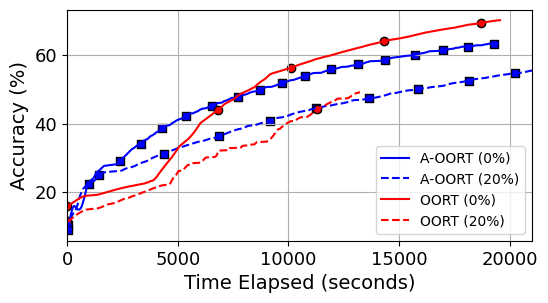

In [108]:
logs = [
    async_oort_synthetic_fail_0,
    async_oort_unaware_synthetic_fail_20,
    oort_synthetic_fail_0,
    oort_unaware_synthetic_fail_20
]

labels = ["A-OORT (0%)", "A-OORT (20%)", "OORT (0%)", "OORT (20%)"]

plot_accuracy_curves(logs, labels, figname="synthetic_expt_unaware")